In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [545]:
df = pd.read_csv("/kaggle/input/cartoon-genre-classifer/final_preprocessed_data.csv")
df.head()

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"


In [546]:
df.head()

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"


In [547]:
df.shape

(24337, 3)

In [548]:
df = df.dropna().reset_index(drop=True)

genre_list = []
indices_to_drop = []

for idx, genres in enumerate(df.Genre.to_list()):
  genres_list = eval(genres)
  if len(genres_list)>=2:
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)

df.shape

(24117, 3)

In [549]:
df=df.drop_duplicates().reset_index(drop=True)

In [466]:
#pd.set_option('display.max_rows', None)


In [550]:
df.shape

(22724, 3)

In [486]:
df.tail()

,Title,Description,Genre
22719,Mitsuboshi Colors,"The ""Colors"" are three cute little girls who hang out together and say they're protecting the peace of their city. They have lots of fun together, doing stuff like playing games, solving puzzles, and going to the zoo. This anime follows their largely happy daily life.","['Fantasy', 'Comedy']"
22720,"Yuusha, Yamemasu","After saving the world, the strongest hero Leo became someone who is not wanted in the peaceful human world. He was too strong. Exiled, he seeks a job at the Demon King's Army, which he had defeated and needs to be rebuilt. The Army had many problems: too much work, financial troubles, etc. Leo starts to make things better using his power. Leo encounters Echidna again, and asks her why she invaded the human world. There was an unexpected story...!","['Adventure', 'Fantasy', 'Comedy', 'Shounen', 'Psychological']"
22721,Zoku Touken Ranbu: Hanamaru,Sequel of Touken Ranbu: Hanamaru.,"['Sci-Fi', 'Fantasy', 'Mystery', 'Horror', 'Psychological', 'Thriller']"
22722,Blue Blink,Story of a young boy named Kakeru and his adventures together with a magical blue pony named Blink.,"['Ecchi', 'Comedy', 'Shounen', 'School', 'Romance']"
22723,Murenase! Seton Gakuen,"Seton Academy, a school full of animals where, thanks to population decline, there are fewer humans than any other creature. Mazama Jin, an animal hater and the only human male in his class, falls in love with Hino Hitomi, the only female human, the moment he lays eyes her. However he soon finds himself entangled with various other creatures after he reluctantly joins the 'pack' of Lanka the wolf, the only other member of her pack.","['Action', 'Game', 'Seinen', 'Harem']"


In [362]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [551]:
df.duplicated().sum()

0

In [552]:
df.head()

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"


In [489]:
shuffled_df = df.sample(frac=1)


In [553]:
df = shuffled_df.reset_index(drop=True)


In [554]:
df.shape

(22724, 3)

In [555]:
df.tail()

,Title,Description,Genre
22719,Mother of the Goddess' Dormitory,"Nagumi Koushi is a 12-year-old boy who was abandoned by his broke father after their house caught on fire, leaving him to roam the streets penniless. He then one day, meets a girl named Minerva who finds him lying on the sidewalk. She takes him to a women’s college dormitory, one known for housing troublesome residents, and asks him to be their ""Dormitory Mother."" Surrounded by older women and forced to deal with their idiosyncrasies, Koushi starts his new life!","['Action', 'Shounen', 'MMORPG', 'RPG', 'Virtual Reality', 'Based on a Web Novel']"
22720,Kami nomi zo Shiru Sekai: Megami-hen,"After releasing fourteen girls from the grasps of runaway spirits by making them fall in love with him, Keima has proven himself to be the Capturing God of both the 2D and 3D worlds! But a new challenge awaits as Diana, the goddess possessing Keima's neighbor Tenri, tasks him to find her siblings, and his only clue to their whereabouts resides with past conquests who still retain their memories. Now Keima is on the hunt in hopes that these divine beings might finally release him from his contract with Hell. But with the shadowy organization known as Vintage out to kill these girls, it beco...","['Action', 'Mecha', 'Magic', 'Ecchi', 'Shounen', 'Romance', 'Harem']"
22721,New Game!!,The main character Suzukaze Aoba graduates from high school and joins a game company. The person who made the game that Aoba loved as a grade-schooler just happens to be Aoba's senior at the company. The story follows girls who work and aspire at the Eaglejump company.,"['Demons', 'Fantasy', 'Shoujo', 'Supernatural', 'Mystery']"
22722,GO-GO Tamagotchi!,"Every 1000 years on Tamagotchi Planet, a special planet change occurs called Tamagottsun (たまごっつん). This is when two Tamagotchi towns, Dream Town and Tamagotchi Town collide to make one new town called Dreamtamatown (ドリたまタウン doritamatown). The story of GO-GO Tamagotchi! focuses on this occurrence and the interaction of old and new Tamagotchi characters from both Dream Town and Tamagotchi Town anime series.","['Action', 'Fantasy', 'Ecchi', 'Comedy']"
22723,Slayers Evolution-R,"The flat-chested, gluttonous Lina Inverse is back! Alongside her bodyguard Gourry, sorcerer-turned-golem Zelgadis, clumsy Amelia and a strange animal named Pokota, Lina is now on the hunt for a magical jar that will free Pokota’s country from the sealing of the evil Rezo. Meanwhile, Zuuma is plotting his revenge on Lina and Xellos once more has mysterious ulterior motives. Can Lina set things right once and for all and finally clear her name?","['Action', 'Shounen', 'Proxy Battles']"


In [493]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [370]:
# table = {}
# for val in data['Genre'].values.tolist():
#   for i in val.split(', '):
#     if i in table.keys():
#       table[i] += 1
#     else:
#       table[i] = 1

In [556]:
genres_list = df.Genre.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 613
{'Action': 7885, 'Sci-Fi': 2923, 'Adventure': 4613, 'Fantasy': 6089, 'Comedy': 9207, 'Shounen': 4957, 'Ecchi': 1806, 'Slice of Life': 3255, 'Sports': 929, 'Based on a Novel': 232, 'Martial Arts': 582, 'Historical': 1288, 'Josei': 169, 'Drama': 4540, 'Animal Protagonists': 400, 'Anthropomorphic': 312, 'Non-Human Protagonists': 884, 'Psychological': 735, 'School Life': 900, 'Based on a Manga': 2431, 'CG Animation': 475, 'Military': 1018, 'Supernatural': 3068, 'Vampire': 346, 'Abstract': 223, 'No Dialogue': 201, 'Shorts': 652, 'Original Work': 1080, 'Romance': 4322, 'Shoujo': 1166, 'Korean Animation': 142, 'Environmental': 27, 'School Club': 185, 'Based on a Visual Novel': 181, 'Adult Couples': 55, 'Death of a Loved One': 43, 'Firefighters': 7, 'Mature Romance': 50, 'Seinen': 2015, 'Iyashikei': 121, 'Mountain Climbing': 5, 'The Great Outdoors': 8, 'Music': 591, 'Exorcists': 26, 'Psychic Powers': 58, 'Superpowers': 361, 'Anime Tamago': 31, 'Horror': 789, 'Chinese Anim

In [557]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(557,
 ['Josei', 'Abstract', 'No Dialogue', 'Korean Animation', 'Environmental'])

In [558]:
genres_list = df.Genre.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)
df = df.drop(df.index[indices_to_drop]).reset_index(drop=True)
# df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(22576, 3)

In [559]:
df['revised_genres'] = revised_genre_list

In [498]:
df.tail()

,Title,Description,Genre,revised_genres
22571,Mother of the Goddess' Dormitory,"Nagumi Koushi is a 12-year-old boy who was abandoned by his broke father after their house caught on fire, leaving him to roam the streets penniless. He then one day, meets a girl named Minerva who finds him lying on the sidewalk. She takes him to a women’s college dormitory, one known for housing troublesome residents, and asks him to be their ""Dormitory Mother."" Surrounded by older women and forced to deal with their idiosyncrasies, Koushi starts his new life!","['Action', 'Shounen', 'MMORPG', 'RPG', 'Virtual Reality', 'Based on a Web Novel']","[Action, Shounen]"
22572,Kami nomi zo Shiru Sekai: Megami-hen,"After releasing fourteen girls from the grasps of runaway spirits by making them fall in love with him, Keima has proven himself to be the Capturing God of both the 2D and 3D worlds! But a new challenge awaits as Diana, the goddess possessing Keima's neighbor Tenri, tasks him to find her siblings, and his only clue to their whereabouts resides with past conquests who still retain their memories. Now Keima is on the hunt in hopes that these divine beings might finally release him from his contract with Hell. But with the shadowy organization known as Vintage out to kill these girls, it beco...","['Action', 'Mecha', 'Magic', 'Ecchi', 'Shounen', 'Romance', 'Harem']","[Action, Mecha, Magic, Ecchi, Shounen, Romance, Harem]"
22573,New Game!!,The main character Suzukaze Aoba graduates from high school and joins a game company. The person who made the game that Aoba loved as a grade-schooler just happens to be Aoba's senior at the company. The story follows girls who work and aspire at the Eaglejump company.,"['Demons', 'Fantasy', 'Shoujo', 'Supernatural', 'Mystery']","[Demons, Fantasy, Shoujo, Supernatural, Mystery]"
22574,GO-GO Tamagotchi!,"Every 1000 years on Tamagotchi Planet, a special planet change occurs called Tamagottsun (たまごっつん). This is when two Tamagotchi towns, Dream Town and Tamagotchi Town collide to make one new town called Dreamtamatown (ドリたまタウン doritamatown). The story of GO-GO Tamagotchi! focuses on this occurrence and the interaction of old and new Tamagotchi characters from both Dream Town and Tamagotchi Town anime series.","['Action', 'Fantasy', 'Ecchi', 'Comedy']","[Action, Fantasy, Ecchi, Comedy]"
22575,Slayers Evolution-R,"The flat-chested, gluttonous Lina Inverse is back! Alongside her bodyguard Gourry, sorcerer-turned-golem Zelgadis, clumsy Amelia and a strange animal named Pokota, Lina is now on the hunt for a magical jar that will free Pokota’s country from the sealing of the evil Rezo. Meanwhile, Zuuma is plotting his revenge on Lina and Xellos once more has mysterious ulterior motives. Can Lina set things right once and for all and finally clear her name?","['Action', 'Shounen', 'Proxy Battles']","[Action, Shounen]"


In [560]:
genre_list = []
indices_to_drop = []

for idx, rev_genres in enumerate(df['revised_genres'].to_list()):
    if len(rev_genres) >= 2:
        genre_list.append(rev_genres[0])
    else:
        indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)


df.shape

(21828, 4)

In [502]:
df.tail()

,Title,Description,Genre,revised_genres
21823,Mother of the Goddess' Dormitory,"Nagumi Koushi is a 12-year-old boy who was abandoned by his broke father after their house caught on fire, leaving him to roam the streets penniless. He then one day, meets a girl named Minerva who finds him lying on the sidewalk. She takes him to a women’s college dormitory, one known for housing troublesome residents, and asks him to be their ""Dormitory Mother."" Surrounded by older women and forced to deal with their idiosyncrasies, Koushi starts his new life!","['Action', 'Shounen', 'MMORPG', 'RPG', 'Virtual Reality', 'Based on a Web Novel']","[Action, Shounen]"
21824,Kami nomi zo Shiru Sekai: Megami-hen,"After releasing fourteen girls from the grasps of runaway spirits by making them fall in love with him, Keima has proven himself to be the Capturing God of both the 2D and 3D worlds! But a new challenge awaits as Diana, the goddess possessing Keima's neighbor Tenri, tasks him to find her siblings, and his only clue to their whereabouts resides with past conquests who still retain their memories. Now Keima is on the hunt in hopes that these divine beings might finally release him from his contract with Hell. But with the shadowy organization known as Vintage out to kill these girls, it beco...","['Action', 'Mecha', 'Magic', 'Ecchi', 'Shounen', 'Romance', 'Harem']","[Action, Mecha, Magic, Ecchi, Shounen, Romance, Harem]"
21825,New Game!!,The main character Suzukaze Aoba graduates from high school and joins a game company. The person who made the game that Aoba loved as a grade-schooler just happens to be Aoba's senior at the company. The story follows girls who work and aspire at the Eaglejump company.,"['Demons', 'Fantasy', 'Shoujo', 'Supernatural', 'Mystery']","[Demons, Fantasy, Shoujo, Supernatural, Mystery]"
21826,GO-GO Tamagotchi!,"Every 1000 years on Tamagotchi Planet, a special planet change occurs called Tamagottsun (たまごっつん). This is when two Tamagotchi towns, Dream Town and Tamagotchi Town collide to make one new town called Dreamtamatown (ドリたまタウン doritamatown). The story of GO-GO Tamagotchi! focuses on this occurrence and the interaction of old and new Tamagotchi characters from both Dream Town and Tamagotchi Town anime series.","['Action', 'Fantasy', 'Ecchi', 'Comedy']","[Action, Fantasy, Ecchi, Comedy]"
21827,Slayers Evolution-R,"The flat-chested, gluttonous Lina Inverse is back! Alongside her bodyguard Gourry, sorcerer-turned-golem Zelgadis, clumsy Amelia and a strange animal named Pokota, Lina is now on the hunt for a magical jar that will free Pokota’s country from the sealing of the evil Rezo. Meanwhile, Zuuma is plotting his revenge on Lina and Xellos once more has mysterious ulterior motives. Can Lina set things right once and for all and finally clear her name?","['Action', 'Shounen', 'Proxy Battles']","[Action, Shounen]"


In [561]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 56
{'Action': 7858, 'Sci-Fi': 2923, 'Adventure': 4586, 'Fantasy': 6071, 'Comedy': 9124, 'Shounen': 4955, 'Ecchi': 1804, 'Slice of Life': 3231, 'Sports': 916, 'Based on a Novel': 228, 'Martial Arts': 581, 'Historical': 1280, 'Drama': 4519, 'Animal Protagonists': 399, 'Anthropomorphic': 312, 'Non-Human Protagonists': 881, 'Psychological': 721, 'School Life': 897, 'Based on a Manga': 2420, 'CG Animation': 450, 'Military': 1018, 'Supernatural': 3060, 'Vampire': 346, 'Shorts': 481, 'Original Work': 1069, 'Romance': 4306, 'Shoujo': 1166, 'Seinen': 2015, 'Music': 574, 'Superpowers': 361, 'Horror': 787, 'Chinese Animation': 538, 'Short Episodes': 747, 'Magic': 1881, 'Shounen Ai': 261, 'School': 2534, 'Mecha': 1609, 'Harem': 1041, 'Family Friendly': 666, 'Demons': 602, 'Super Power': 787, 'Parody': 577, 'Samurai': 348, 'Monsters': 235, 'Based on a Video Game': 295, 'Contemporary Fantasy': 235, 'Person in a Strange World': 256, 'Based on a Light Novel': 534, 'Mystery': 1324, 'S

In [562]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [563]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre] 
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [564]:
df['genre_cat_list'] = categorical_genre_list
df.shape

(21828, 5)

In [507]:
df.tail()

,Title,Description,Genre,revised_genres,genre_cat_list
21823,Mother of the Goddess' Dormitory,"Nagumi Koushi is a 12-year-old boy who was abandoned by his broke father after their house caught on fire, leaving him to roam the streets penniless. He then one day, meets a girl named Minerva who finds him lying on the sidewalk. She takes him to a women’s college dormitory, one known for housing troublesome residents, and asks him to be their ""Dormitory Mother."" Surrounded by older women and forced to deal with their idiosyncrasies, Koushi starts his new life!","['Action', 'Shounen', 'MMORPG', 'RPG', 'Virtual Reality', 'Based on a Web Novel']","[Action, Shounen]","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21824,Kami nomi zo Shiru Sekai: Megami-hen,"After releasing fourteen girls from the grasps of runaway spirits by making them fall in love with him, Keima has proven himself to be the Capturing God of both the 2D and 3D worlds! But a new challenge awaits as Diana, the goddess possessing Keima's neighbor Tenri, tasks him to find her siblings, and his only clue to their whereabouts resides with past conquests who still retain their memories. Now Keima is on the hunt in hopes that these divine beings might finally release him from his contract with Hell. But with the shadowy organization known as Vintage out to kill these girls, it beco...","['Action', 'Mecha', 'Magic', 'Ecchi', 'Shounen', 'Romance', 'Harem']","[Action, Mecha, Magic, Ecchi, Shounen, Romance, Harem]","[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21825,New Game!!,The main character Suzukaze Aoba graduates from high school and joins a game company. The person who made the game that Aoba loved as a grade-schooler just happens to be Aoba's senior at the company. The story follows girls who work and aspire at the Eaglejump company.,"['Demons', 'Fantasy', 'Shoujo', 'Supernatural', 'Mystery']","[Demons, Fantasy, Shoujo, Supernatural, Mystery]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
21826,GO-GO Tamagotchi!,"Every 1000 years on Tamagotchi Planet, a special planet change occurs called Tamagottsun (たまごっつん). This is when two Tamagotchi towns, Dream Town and Tamagotchi Town collide to make one new town called Dreamtamatown (ドリたまタウン doritamatown). The story of GO-GO Tamagotchi! focuses on this occurrence and the interaction of old and new Tamagotchi characters from both Dream Town and Tamagotchi Town anime series.","['Action', 'Fantasy', 'Ecchi', 'Comedy']","[Action, Fantasy, Ecchi, Comedy]","[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21827,Slayers Evolution-R,"The flat-chested, gluttonous Lina Inverse is back! Alongside her bodyguard Gourry, sorcerer-turned-golem Zelgadis, clumsy Amelia and a strange animal named Pokota, Lina is now on the hunt for a magical jar that will free Pokota’s country from the sealing of the evil Rezo. Meanwhile, Zuuma is plotting his revenge on Lina and Xellos once more has mysterious ulterior motives. Can Lina set things right once and for all and finally clear her name?","['Action', 'Shounen', 'Proxy Battles']","[Action, Shounen]","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [508]:
df.shape

(21828, 5)

In [565]:
labels = list(encode_genre_types.keys())

In [510]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [567]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [568]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dls-multilabel-cartoon-classifier.pkl")

In [569]:
dls.vocab

['Action', 'Sci-Fi', 'Adventure', 'Fantasy', 'Comedy', 'Shounen', 'Ecchi', 'Slice of Life', 'Sports', 'Based on a Novel', 'Martial Arts', 'Historical', 'Drama', 'Animal Protagonists', 'Anthropomorphic', 'Non-Human Protagonists', 'Psychological', 'School Life', 'Based on a Manga', 'CG Animation', 'Military', 'Supernatural', 'Vampire', 'Shorts', 'Original Work', 'Romance', 'Shoujo', 'Seinen', 'Music', 'Superpowers', 'Horror', 'Chinese Animation', 'Short Episodes', 'Magic', 'Shounen Ai', 'School', 'Mecha', 'Harem', 'Family Friendly', 'Demons', 'Super Power', 'Parody', 'Samurai', 'Monsters', 'Based on a Video Game', 'Contemporary Fantasy', 'Person in a Strange World', 'Based on a Light Novel', 'Mystery', 'Sci Fi', 'Game', 'Space', 'Thriller', 'Promotional', 'Police', 'Aliens']

In [123]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"The Story takes place in an alternate reality based in the year 1996, where humanity is advanced enough to develop long-range space travel, as well as bases on both the Moon and Mars. However, the Cold War tensions between the United States and the Soviet Union have not ended; rather, they've escalated as both sides build military facilities in space, and the shadow of nuclear conflict looms over humanity, both on and off Earth. Meanwhile, on the Red Planet, an exchange program created by the United Nation","[Shounen, Romance, Ecchi, Action, Magic, Mecha, Harem]"
1,"The Story takes place in an alternate reality based in the year 1996, where humanity is advanced enough to develop long-range space travel, as well as bases on both the Moon and Mars. However, the Cold War tensions between the United States and the Soviet Union have not ended; rather, they've escalated as both sides build military facilities in space, and the shadow of nuclear conflict looms over humanity, both on and off Earth. Meanwhile, on the Red Planet, an exchange program created by the United Nation","[Comedy, Slice of Life, Fantasy]"
2,"Based on a seinen manga by Kusunoki Michiharu serialised in Young Magazine. The story gets its roots from the actual street racing that occurs on Tokyo's Shuto Expressway, one stretch of which is known as the ""Wangan"", literally meaning ""bay side"" (although it is generally used to refer to the freeway), the longest, straightest road in the entire country. Of course, there's also lots of traffic to contend with, including a fair number of heavy trucks. Because of this, the action is inherently hazardous, an","[Comedy, Slice of Life]"
3,"OVAs bundled with the special edition of the 26th, 27th, 31st, 35th and 38th volumes of the manga. 1. Youkoso Fairy Hills! Lucy comes across a mysterious written request. The client is looking for an object that is in Fairy Tail's female dormitory, Fairy Hills. To verify the request, Lucy visits Fairy Hills, and discovers that the client is Hilda, the dormitory head who is looking for a ""shining treasure."" Meanwhile, Natsu and the other guild members are cleaning their pool. 2. Yousei Gakuen: Yankee-kun to","[Action, Sci-Fi, Mecha]"


In [570]:
model = BaseModelWrapper(hf_model)
 
acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls, 
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## Stage - 0

In [33]:
learner.freeze()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


SuggestedLRs(slide=0.005248074419796467, valley=0.0010000000474974513)

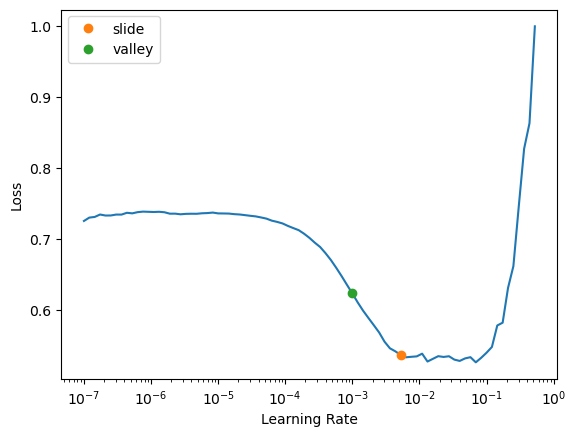

In [34]:
learner.lr_find(suggest_funcs=[slide, valley])

In [35]:
learner.fit_one_cycle(2,0.0030000000474974513)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.225384,0.215557,0.897618,09:53
1,0.220519,0.210134,0.882766,08:19


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [36]:
learner.save("cartoon-classifier-stage_albert-0")

Path('models/cartoon-classifier-stage_albert-0.pth')

## Stage - 1

In [37]:
learner.unfreeze()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


SuggestedLRs(slide=0.009120108559727669, valley=0.0003311311302240938)

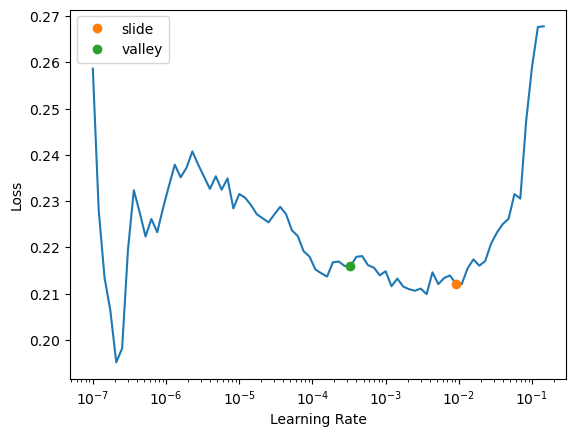

In [38]:
learner.lr_find(suggest_funcs=[slide, valley])

In [39]:
learner.fit_one_cycle(2, slice( 0.009120108559727669,.0003311311302240938))


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.206827,0.210781,0.891608,10:25
1,0.200589,0.210078,0.893159,08:21


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [42]:
learner.save("cartoon-classifier-stage_albert-1")

Path('models/cartoon-classifier-stage_albert-1.pth')

In [43]:
learner.export("models/cartoon-classifier-stage-1.pkl")